In [1]:
import pandas as pd
import numpy as np 

import tensorflow as tf 


In [2]:
import os 
bench, squat, deadlift = [], [], []
root = 'csv_files'
for subdir, dirs, files in os.walk(root):
    for f in files: 
        if 'bench' in f:
            bench.append(pd.read_csv(f'{root}/{f}'))
        elif 'squat' in f:
            squat.append(pd.read_csv(f'{root}/{f}'))
        else:
            deadlift.append(pd.read_csv(f'{root}/{f}'))

In [3]:
import random 
import matplotlib.pyplot as plt 

bench[0].axes

[RangeIndex(start=0, stop=461, step=1),
 Index(['Time', 'Accel_X', 'Accel_Y', 'Accel_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z',
        'dt'],
       dtype='object')]

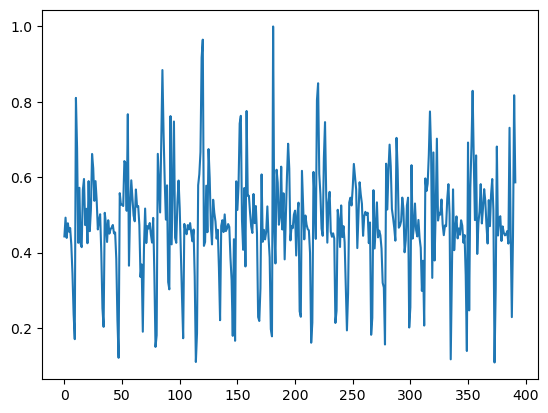

In [4]:
a = random.choice(bench)
sig = np.sum([a[e].to_numpy()**2 for e in ['Accel_X', 'Accel_Y', 'Accel_Z']], axis=0)
sig /= np.max(sig)
plt.plot(sig)

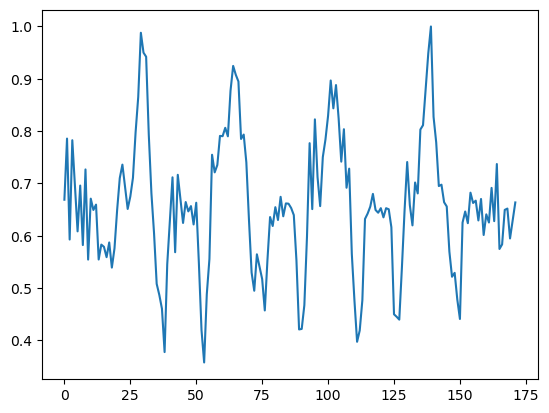

In [5]:
a = random.choice(squat)
sig = np.sum([a[e].to_numpy()**2 for e in ['Accel_X', 'Accel_Y', 'Accel_Z']], axis=0)
sig /= np.max(sig)
plt.plot(sig)

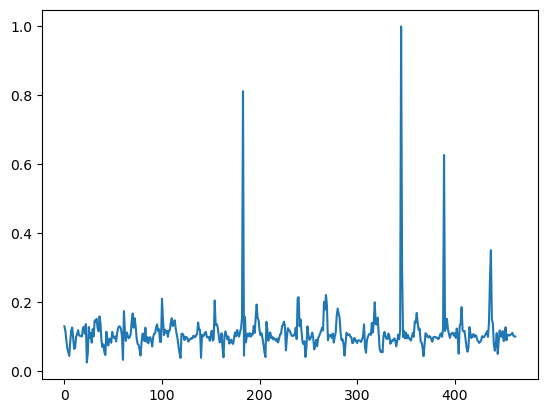

In [6]:
a = random.choice(deadlift)
sig = np.sum([a[e].to_numpy()**2 for e in ['Accel_X', 'Accel_Y', 'Accel_Z']], axis=0)
sig /= np.max(sig)
plt.plot(sig)

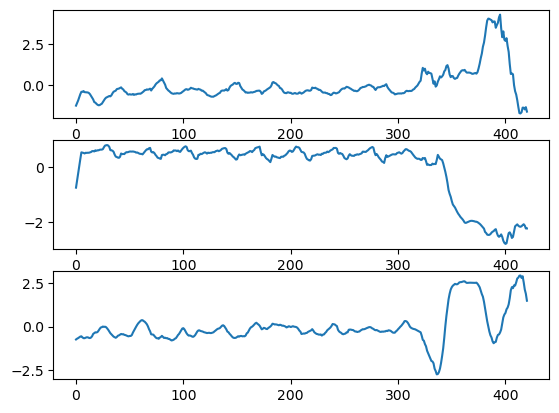

In [7]:
# for rep counting:
a = random.choice(bench)
k = 10
def normalize_1(sig):
    if isinstance(sig, pd.Series):
        sig = sig.to_numpy()
    sig = np.convolve(sig, np.ones((k, ))/k, 'same')
    return (sig - np.mean(sig))/np.std(sig)



def normalize_2(sig):
    if isinstance(sig, pd.Series):
        sig = sig.to_numpy()
    sig = np.convolve(sig, np.ones((k,))/k, 'same')
    return (sig - np.mean(sig))/np.max(np.abs(sig))

def normalize_3(sig, fs=10):
        
    sig = (sig - np.mean(sig))
    freqs = np.fft.fftfreq(len(sig), d=1/fs)
    fft_vals = np.fft.fft(sig)

    cutoff = 0.5
    fft_filtered = fft_vals.copy()
    fft_filtered[np.abs(freqs) > cutoff] = 0
    fft_filtered /= k
    out = np.fft.ifft(fft_filtered).real
    return out/np.max(np.abs(out))


plt.figure()
plt.subplot(311)
plt.plot(normalize_1(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_1(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_1(a['Accel_Z']))




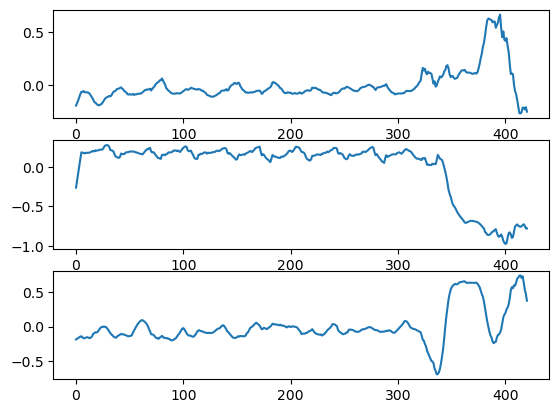

In [8]:
plt.subplot(311)
plt.plot(normalize_2(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_2(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_2(a['Accel_Z']))

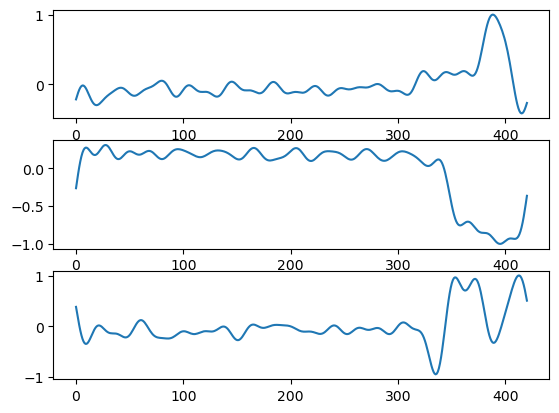

In [9]:

plt.subplot(311)
plt.plot(normalize_3(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_3(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_3(a['Accel_Z']))

# Rep counting

Normalization: Padding, Convolution, subtract mean, divide by either max or std, find most symmetric signal, count its x intercepts. 

subtract mean, fft, cutoff high freq, divide by constant, ifft, divide by max

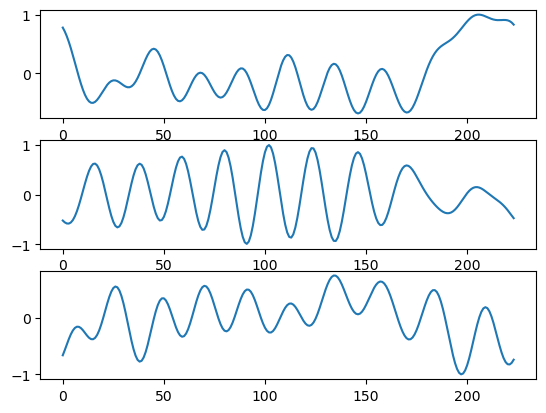

In [10]:
a = random.choice(bench)

plt.subplot(311)
plt.plot(normalize_3(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_3(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_3(a['Accel_Z']))


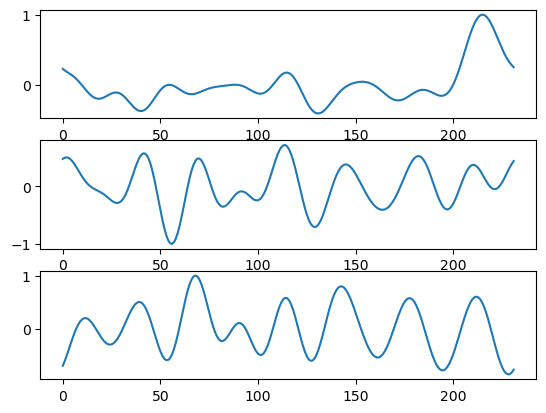

In [11]:
a = random.choice(squat)

plt.subplot(311)
plt.plot(normalize_3(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_3(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_3(a['Accel_Z']))


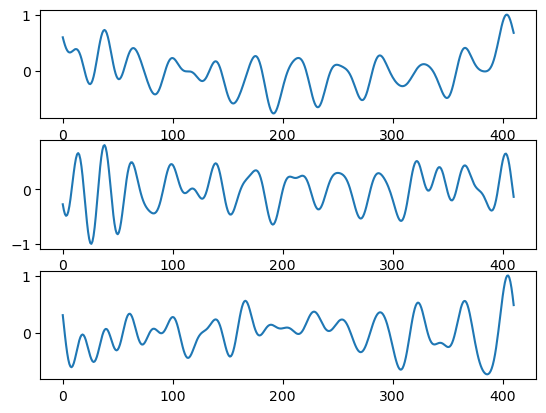

In [12]:
a = random.choice(deadlift)

plt.subplot(311)
plt.plot(normalize_3(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_3(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_3(a['Accel_Z']))


np.float64(14.0)

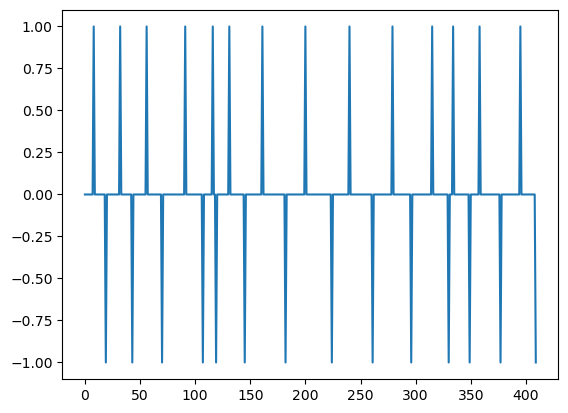

In [13]:
sig = normalize_3(a['Accel_Y'])
sig[sig > 0] = 1
sig[sig < 0] = 0
sig = np.diff(sig)
plt.plot(sig)
np.sum(np.abs(sig))/2

np.float64(14.0)

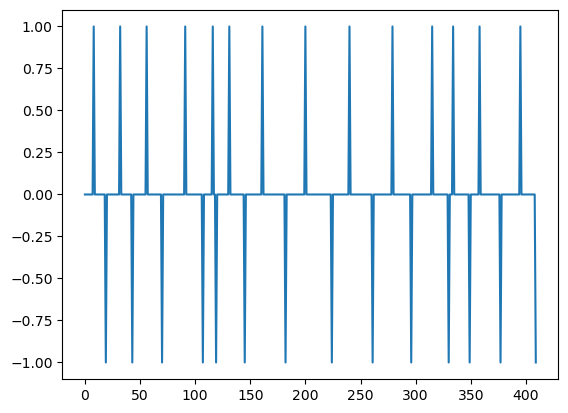

In [14]:
sig = normalize_3(a['Accel_Y'])
sig[sig > 0] = 1
sig[sig < 0] = 0
sig = np.diff(sig)
plt.plot(sig)
np.sum(np.abs(sig))/2

18.0


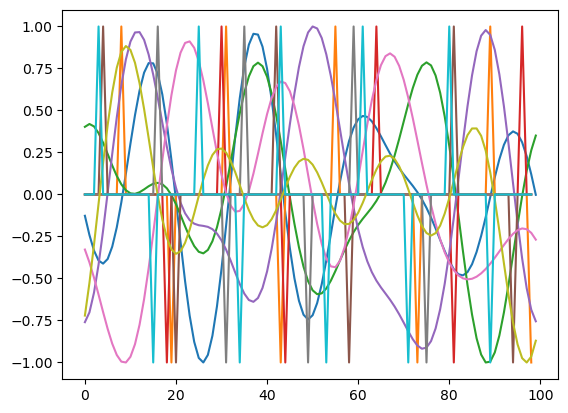

In [15]:
sig = a['Accel_Y'].to_numpy()
sig -= np.mean(sig)
interval = 100
sig = np.concat([sig, [sig[-1]]*(interval - len(sig)%interval)])
sig = sig.reshape((-1, interval))

r = 0
for e in sig:
    e = normalize_3(e)
    plt.plot(normalize_3(e))
    e[e > 0] = 1
    e[e < 0] = 0
    e = np.diff(e)
    plt.plot(e)
    r += np.sum(np.abs(e))/2

print(r)



In [17]:
sig = random.choice(bench)['Accel_Y'].to_numpy()
def batch(sig):
    sig -= np.mean(sig)
    interval = 100
    sig = np.concat([sig, [sig[-1]]*(interval - len(sig)%interval)])
    sig = sig.reshape((-1, interval))
    return sig

def normalize_3(sig, fs=10):
        
    sig = (sig - np.mean(sig))
    freqs = np.fft.fftfreq(len(sig), d=1/fs)
    fft_vals = np.fft.fft(sig)

    cutoff = 0.5
    fft_filtered = fft_vals.copy()
    fft_filtered[np.abs(freqs) > cutoff] = 0
    fft_filtered /= k
    out = np.fft.ifft(fft_filtered).real
    return out/np.max(np.abs(out))

def count(sig):
    e = sig
    e = normalize_3(e)
    e[e > 0] = 1
    e[e < 0] = 0
    e = np.diff(e)
    return np.sum(np.abs(e))/2
sig = batch(sig)
count(sig[0])

np.float64(5.0)

In [19]:
class Rep_Counting_Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.values = tf.constant([0], dtype=tf.float32)
        self.interval = 128
        self.ln2 = tf.math.log(tf.constant(2, dtype=tf.float16))
    
    def batch(self, sig):
        sig -= tf.reduce_mean(sig)
        interval = self.interval
        sig = tf.concat([sig, [sig[-1]]*(interval - len(sig)%interval)], axis=0)
        sig = tf.reshape(sig, (-1, interval))
        return tf.cast(sig, tf.float16)

    def normalize_3(self, sig, fs=10):
        sig = sig - tf.reduce_mean(sig)
        freqs = self.fftshift(tf.linspace(-fs/2, fs/2, tf.shape(sig)[0]))  # frequencies
        fft_vals = self.fft(tf.cast(sig, tf.complex64))
        
        cutoff = 0.5
        mask = tf.abs(freqs) <= cutoff
        fft_filtered = tf.where(mask, fft_vals, tf.zeros_like(fft_vals))
        
        fft_filtered = fft_filtered / k
        out = self.fft(fft_filtered, inverse=True)
        out = tf.math.real(out)
        
        return out / tf.reduce_max(tf.abs(out))
    
    def heaviside_custom(self, x, values):
        ones = tf.ones_like(x)
        zeros = tf.zeros_like(x)
        return tf.where(x > 0, ones, tf.where(x < 0, zeros, values))
    
    @tf.function(input_signature=[tf.TensorSpec([128], dtype=tf.float32)])    
    def call(self, sig):
        e = self.normalize_3(sig)
        e = self.heaviside_custom(e, self.values)
        e = e[1:] - e[:-1]
        return tf.reduce_sum(tf.abs(e))/2

    def log(self, n):
        return tf.math.log(tf.constant(n, dtype=tf.float16))

    def fftshift(self, x):
        """
        Shift zero-frequency component to the center.
        """
        N = tf.shape(x)[0]
        shift = N // 2
        return tf.concat([x[shift:], x[:shift]], axis=0)


    def fft(self, x_real, inverse = False):
        x = tf.cast(x_real, tf.complex64)
        N = tf.shape(x)[0]
        N_int = x.shape[0]

        def bit_reverse_indices(n):
            bits = int(self.log(n)/self.ln2)
            indices = tf.range(n)
            reversed_indices = ['{0:0{1}b}'.format(i, bits)[::-1] for i in indices]
            reversed_indices = [int(s, 2) for s in reversed_indices]
            return tf.constant(reversed_indices, dtype=tf.int16)

        indices = bit_reverse_indices(N_int)
        x = tf.gather(x, indices)
    
        stages = int(self.log(N_int))
        for s in range(1, stages + 1):
            m = 2 ** s
            half_m = m // 2
    
            k = tf.range(half_m, dtype=tf.float16)
            inv = 1 if inverse else -1
            twiddle = tf.exp(inv * 2j * 3.14159265 * tf.cast(k, tf.complex64) / tf.cast(m, tf.complex64))
    
            new_x = tf.TensorArray(tf.complex64, size=N_int)
    
            for i in range(0, N_int, m):
                even = x[i : i + half_m]
                odd = x[i + half_m : i + m]
                t = twiddle * odd
                new_x = new_x.scatter(tf.range(i, i + half_m), even + t)
                new_x = new_x.scatter(tf.range(i + half_m, i + m), even - t)
    
            x = new_x.stack()
    
        return x if not inverse else x/tf.cast(N_int, tf.complex64)


rep_counting_model = Rep_Counting_Model()
sig = rep_counting_model.batch(bench[0]['Accel_X'].to_numpy())
sig = tf.convert_to_tensor(sig, dtype=tf.float16)
a = tf.cast(sig[0], tf.float16)
rep_counting_model(a).numpy()

OperatorNotAllowedInGraphError: Exception encountered when calling Rep_Counting_Model.call().

[1min user code:

    File "/var/folders/1w/x40tsl4n0vj5_t1hjj_r02ym0000gn/T/ipykernel_2027/3232793073.py", line 37, in call  *
        e = self.normalize_3(sig)
    File "/var/folders/1w/x40tsl4n0vj5_t1hjj_r02ym0000gn/T/ipykernel_2027/538128199.py", line 18, in normalize_3  *
        fft_vals = self.fft(tf.cast(sig, tf.complex64))
    File "/var/folders/1w/x40tsl4n0vj5_t1hjj_r02ym0000gn/T/ipykernel_2027/538128199.py", line 62, in bit_reverse_indices  *
        reversed_indices = ['{0:0{1}b}'.format(i, bits)[::-1] for i in indices]

    OperatorNotAllowedInGraphError: Iterating over a symbolic `tf.Tensor` is not allowed. You can attempt the following resolutions to the problem: If you are running in Graph mode, use Eager execution mode or decorate this function with @tf.function. If you are using AutoGraph, you can try decorating this function with @tf.function. If that does not work, then you may be using an unsupported feature or your source code may not be visible to AutoGraph. See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/limitations.md#access-to-source-code for more information.
[0m

Arguments received by Rep_Counting_Model.call():
  • sig=tf.Tensor(shape=(128,), dtype=float32)

In [203]:
a.shape

TensorShape([128])

In [180]:
total = bench + (squat) + deadlift
res = []
for l in total:
    for label in ['Accel_X', 'Accel_Y', 'Accel_Z']:
        sig = l[label].to_numpy()
        sig = rep_counting_model.batch(sig)
        for e in sig:
            res.append(count(e) - rep_counting_model(e))


In [181]:

model = Rep_Counting_Model()
dummy_input = sig[0]
_ = model(dummy_input)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
model = converter.convert()



AttributeError: 'Rep_Counting_Model' object has no attribute '_get_save_spec'

In [149]:
tf.concat([[1, 2, 3], [4, 5, 6]], axis=0)

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6], dtype=int32)>

In [158]:
tf.reduce_mean([1, 2, 3])

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [172]:
tf.reshape([1, 2, 3, 4], shape=(4, -1))

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[1],
       [2],
       [3],
       [4]], dtype=int32)>

In [28]:
signal = tf.constant([[ [1.0], [2.0], [3.0], [4.0], [5.0] ]], dtype=tf.float32)  # shape (1, 5, 1)

# Example kernel: shape [kernel_width, in_channels, out_channels]
kernel = tf.constant([ [ [1.0] ], [ [0.0] ], [ [-1.0] ] ], dtype=tf.float32)  # edge detection
# shape (3, 1, 1)

# Apply 1D convolution
output = tf.nn.conv1d(signal, filters=kernel, stride=1, padding='SAME')


In [32]:
signal.shape

TensorShape([1, 5, 1])